C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ระดับความเสี่ยงที่ได้ คือ : 2.0


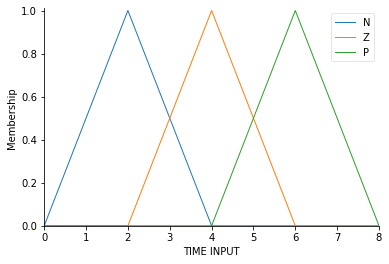

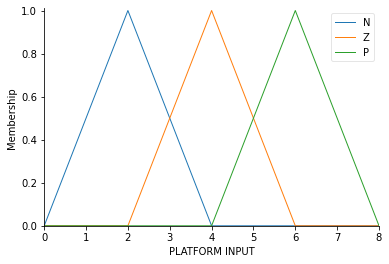

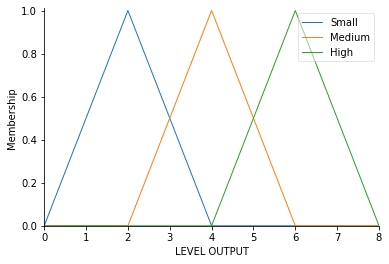

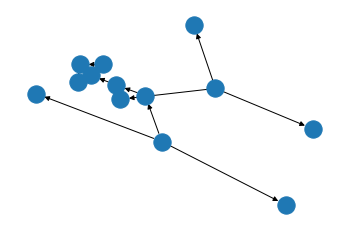

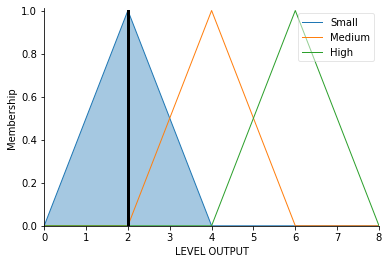

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
     
#กำหนดตัวแปร (X,Y) INPUT และ ตัวแปรตาม(Z) OUTPUT  
time     = ctrl.Antecedent(np.arange(0, 9, 1), 'TIME INPUT')     #จำนวนเวลาที่นำเข้ามา 
platform = ctrl.Antecedent(np.arange(0, 9, 1), 'PLATFORM INPUT') #จำนวนแพลตฟอร์มที่นำเข้ามา 
level    = ctrl.Consequent(np.arange(0, 9, 1), 'LEVEL OUTPUT')   #เเสดงผลค่าระดับผลทำนายความเสี่ยง 
    

    
# Graph \INPUT.X\
time['N'] = fuzz.trimf(time.universe, [0, 2, 4]) 
time['Z'] = fuzz.trimf(time.universe, [2, 4, 6])
time['P'] = fuzz.trimf(time.universe, [4, 6, 8])
    
# Graph \INPUT.Y\ 
platform['N'] = fuzz.trimf(platform.universe, [0, 2, 4])
platform['Z'] = fuzz.trimf(platform.universe, [2, 4, 6])
platform['P'] = fuzz.trimf(platform.universe, [4, 6, 8]) 
    
# Graph \OUTPUT.Z\ 
level['Small']  = fuzz.trimf(level.universe, [0, 2, 4])
level['Medium'] = fuzz.trimf(level.universe, [2, 4, 6])
level['High']   = fuzz.trimf(level .universe,[4, 6, 8]) 
    
# You can see how these look with .view()
time.view()
platform.view()
level.view()
    
# Column N
rule1 = ctrl.Rule(time['N'] | platform['N'], level['Small'])
rule2 = ctrl.Rule(time['N'] & platform['Z'], level['Medium'])
rule3 = ctrl.Rule(time['N'] & platform['P'], level['Medium'])

# Column Z
rule4 = ctrl.Rule(time['Z'] & platform['N'], level['Medium'])
rule5 = ctrl.Rule(time['Z'] | platform['Z'], level['High'])
rule6 = ctrl.Rule(time['Z'] & platform['P'], level['High'])
    
# Column P
rule7 = ctrl.Rule(time['P'] & platform['N'], level['Medium'])
rule8 = ctrl.Rule(time['P'] & platform['Z'], level['High'])
rule9 = ctrl.Rule(time['P'] | platform['P'], level['High'])
    
rule1.view()
levels_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,
                                    rule4, rule5, rule6,
                                    rule7, rule8, rule9])
    
levels = ctrl.ControlSystemSimulation(levels_ctrl)

levels.input['TIME INPUT'] = 2
levels.input['PLATFORM INPUT'] = 1
    
levels.compute()
print("ระดับความเสี่ยงที่ได้ คือ :",levels.output['LEVEL OUTPUT'])
level.view(sim=levels)
#นำ codeเรื่องเเรก fuzzy control